In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

% matplotlib inline

In [103]:
df = pd.read_csv('../data/All_data_cbs.csv').drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [104]:
df.columns

Index(['rowHash', 'Id', 'Title', 'Description', 'LikeCount', 'DislikeCount',
       'ViewCount', 'FavoriteCount', 'CommentCount', 'PublishedAt',
       'Channel Id', 'Channel Title', 'Lang', 'publishedAt', 'subscriberCount',
       'channelVideoCount', 'channelViewCount', 'nextHash', 'PrevCommentCount',
       'PrevDislikeCount', 'PrevLikeCount', 'PrevPublishedAt', 'PrevViewCount',
       'PrevTitle', 'PublishedYear', 'ChannelAge', 'Title-clickbait',
       'PrevTitle-clickbait'],
      dtype='object')

In [119]:
def top_k_percentile_views_mask(df, k):
    top_k_percent = df['ViewCount'].nlargest(int(df.shape[0] * (k / 100.))).iloc[-1]
    return df['ViewCount'] > top_k_percent

In [105]:
df['PublishedAt'] = pd.to_datetime(df['PublishedAt'], errors='coerce')
df['PrevPublishedAt'] = pd.to_datetime(df['PrevPublishedAt'], errors='coerce')
df.dropna()

,rowHash,Id,Title,Description,LikeCount,DislikeCount,ViewCount,FavoriteCount,CommentCount,PublishedAt,...,PrevCommentCount,PrevDislikeCount,PrevLikeCount,PrevPublishedAt,PrevViewCount,PrevTitle,PublishedYear,ChannelAge,Title-clickbait,PrevTitle-clickbait
0,0,Scp3JH3eVLw,Depeche Mode It's No Good,DANCA MUITO.,0,0,18,0,0,2017-06-25 19:12:16,...,0.0,2.0,14.0,2012-03-28 18:01:31,3911.0,the best of Jay cutler Dorian Yates,2017,2008,0.660503,0.782542
1,1,wLqmkz6u8G4,the best of Jay cutler Dorian Yates,Jay cutler e Dorian Yates,14,2,3911,0,0,2012-03-28 18:01:31,...,5.0,2.0,8.0,2010-08-23 16:12:50,3853.0,Iron Man Andy photos NO PAIN NO GAIN,2012,2008,0.782542,0.974470
2,2,nKMsh79uOcM,Iron Man Andy photos NO PAIN NO GAIN,Iron Man Andy muscle NO PAIN NO GAIN,8,2,3853,0,5,2010-08-23 16:12:50,...,0.0,2.0,3.0,2010-05-17 10:15:48,1392.0,the mission SEVERINA,2010,2008,0.974470,0.116492
3,4,E--7XtuuqAg,Mooring Anchor Carry 120kg at Papar Strongestm...,Only manage 11 meters,0,0,56,0,0,2016-10-10 15:07:16,...,0.0,0.0,0.0,2016-10-10 15:01:02,74.0,Tire Flip 450kg at Papar Strongestman 2016,2016,2011,0.323020,0.260023
4,5,fdsppIOelPw,Tire Flip 450kg at Papar Strongestman 2016,450kg x 5 flips,0,0,74,0,0,2016-10-10 15:01:02,...,0.0,0.0,0.0,2016-10-10 14:59:15,46.0,Farmer Walk 125kg each hand at Papar Strongest...,2016,2011,0.260023,0.141004
5,6,tJ3bb0V5y2Y,Farmer Walk 125kg each hand at Papar Strongest...,125kg x 2 for 40 meters,0,0,46,0,0,2016-10-10 14:59:15,...,0.0,0.0,0.0,2016-10-10 14:53:25,52.0,Truck Pull 14 tonnes at Papar Strongestman 2016,2016,2011,0.141004,0.572714
6,7,UYnmMwiNGUU,Truck Pull 14 tonnes at Papar Strongestman 2016,Almost 20 meters,0,0,52,0,0,2016-10-10 14:53:25,...,0.0,0.0,0.0,2016-10-10 14:51:32,31.0,Atlas Stone at Papar Strongestman 2016,2016,2011,0.572714,0.197839
7,8,3anYa8MAjvA,Atlas Stone at Papar Strongestman 2016,I manage carry up to 130kg stone,0,0,31,0,0,2016-10-10 14:51:32,...,0.0,0.0,1.0,2016-08-26 22:47:27,112.0,Deadlift 240kg Arnold Classic Asia Hong Kong,2016,2011,0.197839,0.451104
8,10,lT5lqT0zJgk,200kg Bench Press with support,Just wanna get the feel. My PR only 160 at the...,2,0,109,0,0,2016-03-02 08:17:23,...,0.0,0.0,0.0,2016-02-18 05:55:58,164.0,Farmer Walk 130kg Arnold Classic Australia,2016,2011,0.565735,0.113987
9,11,9qIULP6nY04,Farmer Walk 130kg Arnold Classic Australia,"Arnold Classic Australia Qualifier 2016, Victo...",0,0,164,0,0,2016-02-18 05:55:58,...,0.0,0.0,2.0,2015-11-24 08:19:52,99.0,Car Deadlift at Final Singapore Strongman 2015...,2016,2011,0.113987,0.037554


In [106]:
df['PublishedYear'] = df['PublishedAt'].dt.year
df['PublishedMonth'] = df['PublishedAt'].dt.month
df['PublishedDay'] = df['PublishedAt'].dt.day

df['PrevPublishedYear'] = df['PrevPublishedAt'].dt.year
df['PrevPublishedMonth'] = df['PrevPublishedAt'].dt.month
df['PrevPublishedDay'] = df['PrevPublishedAt'].dt.day

In [107]:
df = df[df['PrevViewCount'] > 0]
view_count_difference = df['ViewCount'] - df['PrevViewCount']
df['PercentDifference'] = view_count_difference / df['PrevViewCount']
df['YearDifference'] = df['PublishedYear'] - df['PrevPublishedYear']
df['MonthDifference'] = df['PublishedMonth'] - df['PrevPublishedMonth']
df['DayDifference'] = df['PublishedDay'] - df['PrevPublishedDay']

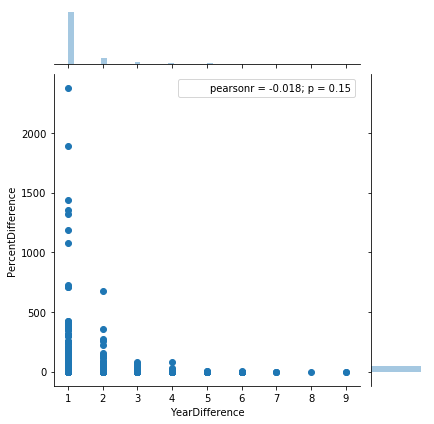

In [108]:
df_t = df[df['YearDifference'] > 0]
sns.jointplot(df_t['YearDifference'], df_t['PercentDifference'])

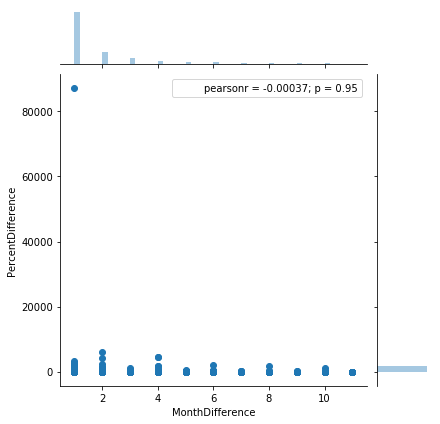

In [109]:
df_t = df[(df['YearDifference'] < 1) & (df['MonthDifference'] > 0)]
sns.jointplot(df_t['MonthDifference'], df_t['PercentDifference'])

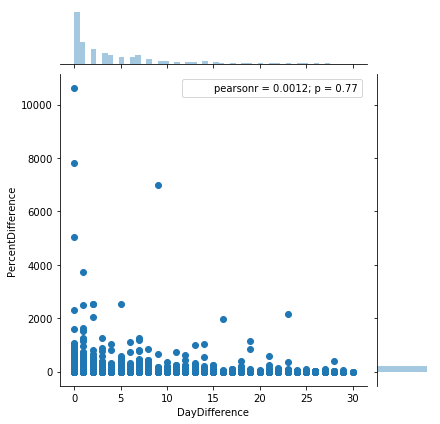

In [110]:
df_t = df[(df['YearDifference'] < 1) & (df['MonthDifference'] < 1)]
sns.jointplot(df_t['DayDifference'], df_t['PercentDifference'])

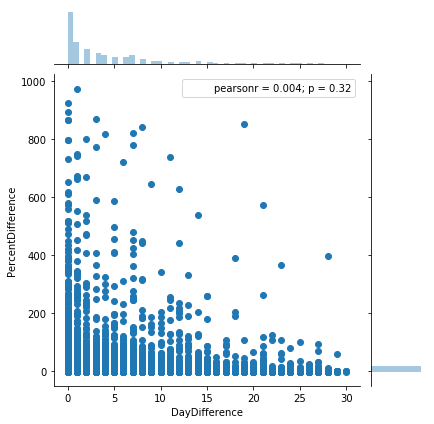

In [111]:
df_t = df[(df['YearDifference'] < 1) & (df['MonthDifference'] < 1) & (df['PercentDifference'] < 1000)]
sns.jointplot(df_t['DayDifference'], df_t['PercentDifference'])

# Looking at difference in clickbait scores

In [114]:
df['clickbait-difference'] = df['Title-clickbait'] - df['PrevTitle-clickbait']

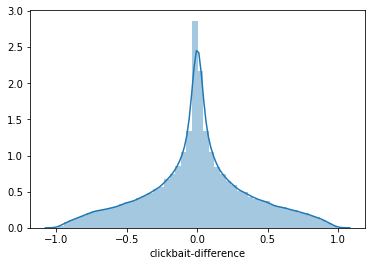

In [123]:
sns.distplot(df['clickbait-difference'])

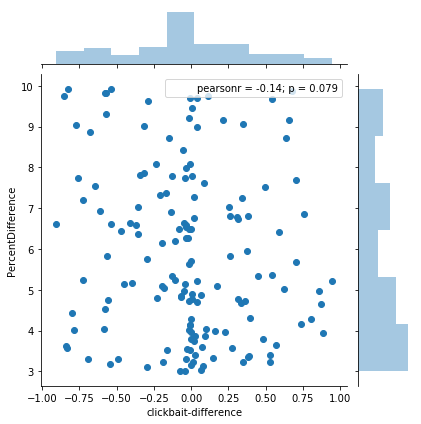

In [128]:
top_k = top_k_percentile_views_mask(df, 1)
percent_diff_mask = (df['PercentDifference'] < 10) & (df['PercentDifference'] > 3)
df_t = df[percent_diff_mask & top_k]
sns.jointplot(df_t['clickbait-difference'], df_t['PercentDifference'])